### Setting Up a Loss Function

In [51]:
import torch
torch.__version__
torch.tensor

<function torch._VariableFunctionsClass.tensor>

In [52]:
#height of people
t_c = torch.tensor([58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 
67.0, 68.0, 69.0, 70.0, 71.0, 72.0])
#weight of people
t_u = torch.tensor([115.0, 117.0, 120.0, 123.0, 126.0, 129.0, 132.0, 135.0, 
139.0, 142.0, 146.0, 150.0, 154.0, 159.0,164.0])

In [53]:
def model(t_u, w, b):
    return w * t_u + b
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [54]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)

In [55]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b),t_c) - loss_fn(model(t_u, w - delta, b),t_c)) / (2.0 * delta)
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w 

loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c)- loss_fn(model(t_u, w, b - delta), t_c)) /  (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b
b

tensor([544.])

In [56]:
from torch import nn
loss = nn.MSELoss()
input = torch.randn(10, 5, requires_grad=True)
target = torch.randn(10, 5)
output = loss(input, target)
output.backward()

### Estimating the Derivative  of the Loss Function

In [57]:
input

tensor([[-0.9425, -0.5512, -0.5888, -0.3382,  0.4678],
        [-1.4316, -0.5093,  0.3783, -1.0841, -0.0042],
        [ 0.4352, -0.1482,  0.3118,  1.2978,  0.3641],
        [ 0.3778, -0.8686, -0.2805, -0.0493,  1.1387],
        [-0.3981, -0.9614,  1.7285,  0.8838,  0.4223],
        [-0.8002,  1.9371,  0.3855, -1.1468,  0.9564],
        [ 0.9507,  0.2160,  0.4964, -0.9707,  0.0221],
        [ 1.1159,  0.3997, -1.5680,  0.2827, -0.7713],
        [ 1.1108, -0.8508,  1.4270,  1.4272, -1.2332],
        [ 0.2492, -0.6449,  1.1949, -0.2358, -0.3732]], requires_grad=True)

In [58]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs
def model(t_u, w, b):
    return w * t_u + b
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db(t_u, w, b):
    return 1.0
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [59]:
params = torch.tensor([ 0.0041, -0.6090])

nepochs = 1000
learning_rate = 0.00000005
for epoch in range(nepochs):
    # forward pass
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    # backward pass
    grad = grad_fn(t_u, t_c, t_p, w, b)
    print('Params:', params)
    print('Grad:', grad)
    params = params - learning_rate * grad

Epoch 0, Loss 4249.436035
Params: tensor([ 0.0041, -0.6090])
Grad: tensor([-17915.5293,   -130.0968])
Epoch 1, Loss 4233.401855
Params: tensor([ 0.0050, -0.6090])
Grad: tensor([-17881.6328,   -129.8518])
Epoch 2, Loss 4217.428223
Params: tensor([ 0.0059, -0.6090])
Grad: tensor([-17847.7988,   -129.6073])
Epoch 3, Loss 4201.515625
Params: tensor([ 0.0068, -0.6090])
Grad: tensor([-17814.0254,   -129.3632])
Epoch 4, Loss 4185.662109
Params: tensor([ 0.0077, -0.6090])
Grad: tensor([-17780.3203,   -129.1197])
Epoch 5, Loss 4169.869629
Params: tensor([ 0.0086, -0.6090])
Grad: tensor([-17746.6777,   -128.8765])
Epoch 6, Loss 4154.136719
Params: tensor([ 0.0094, -0.6090])
Grad: tensor([-17713.0996,   -128.6339])
Epoch 7, Loss 4138.462891
Params: tensor([ 0.0103, -0.6090])
Grad: tensor([-17679.5840,   -128.3916])
Epoch 8, Loss 4122.848633
Params: tensor([ 0.0112, -0.6089])
Grad: tensor([-17646.1328,   -128.1499])
Epoch 9, Loss 4107.293945
Params: tensor([ 0.0121, -0.6089])
Grad: tensor([-17612.

In [60]:
def model(t_u, w, b):
    return w * t_u + b
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [61]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
loss = loss_fn(model(t_u, *params), t_c)

###  Fine-Tuning a Model

In [62]:
loss.backward()
params.grad

tensor([19936.2676,   143.4667])

In [63]:
if params.grad is not None:
    params.grad.zero_()
def model(t_u, w, b):
    return w * t_u + b
def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [64]:
params.grad

tensor([0., 0.])

In [65]:
t_u

tensor([115., 117., 120., 123., 126., 129., 132., 135., 139., 142., 146., 150.,
        154., 159., 164.])

In [66]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

t_un = 0.1 * t_u


nepochs = 5000
learning_rate = 0.001
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    # backward pass
    if params.grad is not None:
        params.grad.zero_()
    loss.backward()
    #params.grad.clamp_(-1.0, 1.0)
    #print(params, params.grad)
    params = (params - learning_rate * params.grad).detach().requires_grad_()
params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 1019.346863
Epoch 2, Loss 396.189301
Epoch 3, Loss 156.941208
Epoch 4, Loss 65.086739
Epoch 5, Loss 29.821062
Epoch 6, Loss 16.281317
Epoch 7, Loss 11.082800
Epoch 8, Loss 9.086715
Epoch 9, Loss 8.320149
Epoch 10, Loss 8.025607
Epoch 11, Loss 7.912304
Epoch 12, Loss 7.868584
Epoch 13, Loss 7.851569
Epoch 14, Loss 7.844817
Epoch 15, Loss 7.842016
Epoch 16, Loss 7.840695
Epoch 17, Loss 7.839971
Epoch 18, Loss 7.839478
Epoch 19, Loss 7.839064
Epoch 20, Loss 7.838679
Epoch 21, Loss 7.838317
Epoch 22, Loss 7.837945
Epoch 23, Loss 7.837583
Epoch 24, Loss 7.837235
Epoch 25, Loss 7.836850
Epoch 26, Loss 7.836495
Epoch 27, Loss 7.836151
Epoch 28, Loss 7.835764
Epoch 29, Loss 7.835413
Epoch 30, Loss 7.835062
Epoch 31, Loss 7.834693
Epoch 32, Loss 7.834333
Epoch 33, Loss 7.833957
Epoch 34, Loss 7.833606
Epoch 35, Loss 7.833253
Epoch 36, Loss 7.832891
Epoch 37, Loss 7.832518
Epoch 38, Loss 7.832154
Epoch 39, Loss 7.831805
Epoch 40, Loss 7.831443
Epoch 41, Lo

tensor([4.5076, 3.0989], requires_grad=True)

In [67]:
params

tensor([4.5076, 3.0989], requires_grad=True)

### Selecting an Optimization Function

In [68]:
import torch.optim as optim

In [69]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()

In [70]:
params

tensor([ 0.8006, -0.0014], requires_grad=True)

In [71]:
loss

tensor(5259.7334, grad_fn=<MeanBackward0>)

In [72]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [73]:
loss

tensor(2642.4553, grad_fn=<MeanBackward0>)

In [74]:
params

tensor([15.1201,  1.0265], requires_grad=True)

In [75]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
nepochs = 5000
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
t_p = model(t_un, *params)
params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 1019.346863
Epoch 2, Loss 396.189301
Epoch 3, Loss 156.941208
Epoch 4, Loss 65.086739
Epoch 5, Loss 29.821062
Epoch 6, Loss 16.281317
Epoch 7, Loss 11.082800
Epoch 8, Loss 9.086715
Epoch 9, Loss 8.320149
Epoch 10, Loss 8.025607
Epoch 11, Loss 7.912304
Epoch 12, Loss 7.868584
Epoch 13, Loss 7.851569
Epoch 14, Loss 7.844817
Epoch 15, Loss 7.842016
Epoch 16, Loss 7.840695
Epoch 17, Loss 7.839971
Epoch 18, Loss 7.839478
Epoch 19, Loss 7.839064
Epoch 20, Loss 7.838679
Epoch 21, Loss 7.838317
Epoch 22, Loss 7.837945
Epoch 23, Loss 7.837583
Epoch 24, Loss 7.837235
Epoch 25, Loss 7.836850
Epoch 26, Loss 7.836495
Epoch 27, Loss 7.836151
Epoch 28, Loss 7.835764
Epoch 29, Loss 7.835413
Epoch 30, Loss 7.835062
Epoch 31, Loss 7.834693
Epoch 32, Loss 7.834333
Epoch 33, Loss 7.833957
Epoch 34, Loss 7.833606
Epoch 35, Loss 7.833253
Epoch 36, Loss 7.832891
Epoch 37, Loss 7.832518
Epoch 38, Loss 7.832154
Epoch 39, Loss 7.831805
Epoch 40, Loss 7.831443
Epoch 41, Lo

Epoch 150, Loss 7.791794
Epoch 151, Loss 7.791426
Epoch 152, Loss 7.791071
Epoch 153, Loss 7.790713
Epoch 154, Loss 7.790362
Epoch 155, Loss 7.789998
Epoch 156, Loss 7.789625
Epoch 157, Loss 7.789285
Epoch 158, Loss 7.788919
Epoch 159, Loss 7.788546
Epoch 160, Loss 7.788197
Epoch 161, Loss 7.787843
Epoch 162, Loss 7.787467
Epoch 163, Loss 7.787117
Epoch 164, Loss 7.786764
Epoch 165, Loss 7.786409
Epoch 166, Loss 7.786045
Epoch 167, Loss 7.785672
Epoch 168, Loss 7.785331
Epoch 169, Loss 7.784963
Epoch 170, Loss 7.784600
Epoch 171, Loss 7.784249
Epoch 172, Loss 7.783887
Epoch 173, Loss 7.783524
Epoch 174, Loss 7.783173
Epoch 175, Loss 7.782814
Epoch 176, Loss 7.782442
Epoch 177, Loss 7.782103
Epoch 178, Loss 7.781731
Epoch 179, Loss 7.781362
Epoch 180, Loss 7.781026
Epoch 181, Loss 7.780657
Epoch 182, Loss 7.780284
Epoch 183, Loss 7.779945
Epoch 184, Loss 7.779582
Epoch 185, Loss 7.779212
Epoch 186, Loss 7.778868
Epoch 187, Loss 7.778503
Epoch 188, Loss 7.778138
Epoch 189, Loss 7.777796


tensor([4.5076, 3.0989], requires_grad=True)

In [76]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
nepochs = 10000
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
for epoch in range(nepochs):
    # forward pass
    t_p = model(t_un, *params)
    loss = loss_fn(t_p, t_c)
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
t_p = model(t_un, *params)
params

Epoch 0, Loss 2642.455322
Epoch 1, Loss 2493.164551
Epoch 2, Loss 2348.348389
Epoch 3, Loss 2208.080322
Epoch 4, Loss 2072.426270
Epoch 5, Loss 1941.445190
Epoch 6, Loss 1815.186401
Epoch 7, Loss 1693.692017
Epoch 8, Loss 1576.993530
Epoch 9, Loss 1465.112915
Epoch 10, Loss 1358.061890
Epoch 11, Loss 1255.840942
Epoch 12, Loss 1158.440552
Epoch 13, Loss 1065.838989
Epoch 14, Loss 978.003906
Epoch 15, Loss 894.890991
Epoch 16, Loss 816.444336
Epoch 17, Loss 742.597107
Epoch 18, Loss 673.269714
Epoch 19, Loss 608.372925
Epoch 20, Loss 547.805786
Epoch 21, Loss 491.457184
Epoch 22, Loss 439.206055
Epoch 23, Loss 390.921997
Epoch 24, Loss 346.466034
Epoch 25, Loss 305.691254
Epoch 26, Loss 268.443207
Epoch 27, Loss 234.562042
Epoch 28, Loss 203.882339
Epoch 29, Loss 176.234390
Epoch 30, Loss 151.445496
Epoch 31, Loss 129.341202
Epoch 32, Loss 109.745560
Epoch 33, Loss 92.483185
Epoch 34, Loss 77.380013
Epoch 35, Loss 64.264122
Epoch 36, Loss 52.967041
Epoch 37, Loss 43.324543
Epoch 38, Los

tensor([ 2.8725, 25.7235], requires_grad=True)

In [77]:
!python --version

Python 3.9.21


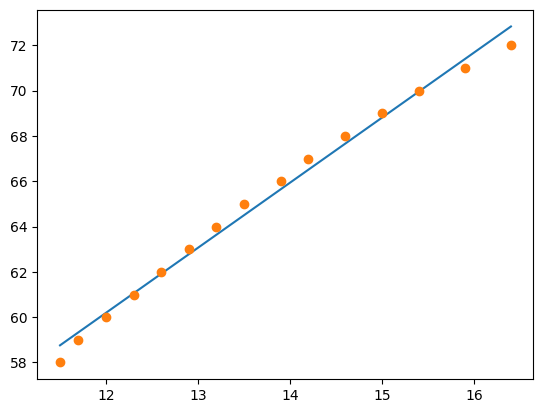

In [78]:
from matplotlib import pyplot as plt

plt.plot(0.1 * t_u.numpy(), t_p.detach().numpy())
plt.plot(0.1 * t_u.numpy(), t_c.numpy(), 'o')

### Further Optimizing the Function

In [79]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)

In [80]:
n_samples

15

In [81]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [82]:
 def model(t_u, w, b):
    return w * t_u + b
 def loss_fn(t_p, t_c):
    sq_diffs = (t_p - t_c)**2
    return sq_diffs.mean()

In [83]:
 t_u_train = t_u[train_indices]
 t_c_train = t_c[train_indices]
 t_u_val = t_u[val_indices]
 t_c_val = t_c[val_indices]

 params = torch.tensor([1.0, 0.0], requires_grad=True)
 nepochs = 5000
 learning_rate = 1e-4
 optimizer = optim.SGD([params], lr=learning_rate)
 t_un_train = 0.1 * t_u_train
 t_un_val = 0.1 * t_u_val

In [84]:
for epoch in range(nepochs):
 # forward pass
 t_p_train = model(t_un_train, *params)
 loss_train = loss_fn(t_p_train, t_c_train)
 t_p_val = model(t_un_val, *params)
 loss_val = loss_fn(t_p_val, t_c_val)
 print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, 
float(loss_train),
 float 
(loss_val)))
 # backward pass
 optimizer.zero_grad()
 loss_train.backward()
 optimizer.step()
 t_p = model(t_un, *params)
 params

Epoch 0, Training loss 2612.098389, Validation loss 2763.883545
Epoch 1, Training loss 2420.336670, Validation loss 2559.940186
Epoch 2, Training loss 2242.704346, Validation loss 2371.037354
Epoch 3, Training loss 2078.160889, Validation loss 2196.066650
Epoch 4, Training loss 1925.741821, Validation loss 2034.000488
Epoch 5, Training loss 1784.553345, Validation loss 1883.887573
Epoch 6, Training loss 1653.768555, Validation loss 1744.847046
Epoch 7, Training loss 1532.619995, Validation loss 1616.061890
Epoch 8, Training loss 1420.398071, Validation loss 1496.776733
Epoch 9, Training loss 1316.445435, Validation loss 1386.291138
Epoch 10, Training loss 1220.152344, Validation loss 1283.956299
Epoch 11, Training loss 1130.954590, Validation loss 1189.171021
Epoch 12, Training loss 1048.328979, Validation loss 1101.378784
Epoch 13, Training loss 971.791687, Validation loss 1020.063965
Epoch 14, Training loss 900.894043, Validation loss 944.749207
Epoch 15, Training loss 835.220215, Va

In [85]:
#page 88
for epoch in range(nepochs):
  # forward pass
  t_p_train = model(t_un_train, *params)
  loss_train = loss_fn(t_p_train, t_c_train)
  with torch.no_grad():
    t_p_val = model(t_un_val, *params)
    loss_val = loss_fn(t_p_val, t_c_val)
  print('Epoch %d, Training loss %f, Validation loss %f' % (epoch, float(loss_train), float (loss_val)))
  # backward pass
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
params

Epoch 0, Training loss 9.336967, Validation loss 0.786598
Epoch 1, Training loss 9.336925, Validation loss 0.786598
Epoch 2, Training loss 9.336864, Validation loss 0.786592
Epoch 3, Training loss 9.336823, Validation loss 0.786590
Epoch 4, Training loss 9.336755, Validation loss 0.786584
Epoch 5, Training loss 9.336716, Validation loss 0.786581
Epoch 6, Training loss 9.336658, Validation loss 0.786574
Epoch 7, Training loss 9.336607, Validation loss 0.786572
Epoch 8, Training loss 9.336550, Validation loss 0.786566
Epoch 9, Training loss 9.336509, Validation loss 0.786563
Epoch 10, Training loss 9.336448, Validation loss 0.786556
Epoch 11, Training loss 9.336396, Validation loss 0.786555
Epoch 12, Training loss 9.336334, Validation loss 0.786548
Epoch 13, Training loss 9.336289, Validation loss 0.786535
Epoch 14, Training loss 9.336234, Validation loss 0.786534
Epoch 15, Training loss 9.336167, Validation loss 0.786528
Epoch 16, Training loss 9.336125, Validation loss 0.786525
Epoch 1

tensor([4.6608, 0.9942], requires_grad=True)

#### Example for gradient (cmpute)

In [86]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([2.0], requires_grad=True)

# Perform some operations
y = x * 3 + 2
z = y**2

# Calculate the gradient of z with respect to x
z.backward()

# Print the gradient
print(x.grad)  # Output: tensor([24.])

# Create a tensor with requires_grad=False
a = torch.tensor([5.0]) # requires_grad is False by default

b = a * 2
#b.backward() # This will throw an error since a does not require grad.


tensor([48.])


### Implementing a Convolutional Neural Network (CNN)

In [87]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)    
# reproducible


In [88]:
# Hyper Parameters
EPOCH = 1
# train the input data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
# 50 samples at a time to pass through the epoch
LR = 0.001
# learning rate
DOWNLOAD_MNIST = True
# set to False if you have downloaded
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    # this is training data
    transform=torchvision.transforms.ToTensor(),
    # torch.FloatTensor of shape (Color x Height x Width) and
    #normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
    # download it if you don't have it
    )
 # plot one example
print(train_data.train_data.size())                 
print(train_data.train_labels.size())               
# (60000, 28, 28)
# (60000)


torch.Size([60000, 28, 28])
torch.Size([60000])


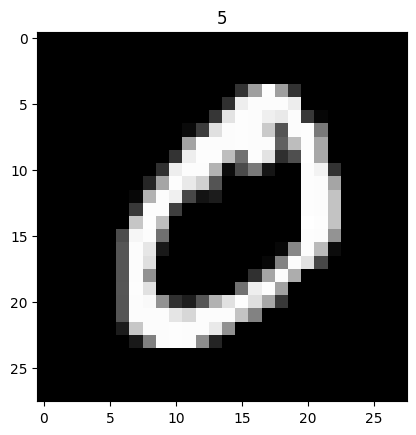

torch.Size([60000])

In [89]:
plt.imshow(train_data.train_data[1].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()
torch.Size([60000, 28, 28])
torch.Size([60000])

In [90]:
# Data Loader for easy mini-batch return in training, the image batch 
#(50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


In [91]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255.
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

In [92]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [93]:
type(test_x)

torch.Tensor

In [94]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,
                # input shape (1, 28, 28)
                # input height
                # n_filters
                # filter size
                # filter movement/step
                # if want same width and length of this image after con2d,
                #padding=(kernel_size-1)/2 if stride=1
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),
            # output shape (16, 28, 28)
            # activation
            # choose max value in 2x2 area, output shape (16, 14, 14)
            )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # input shape (1, 28, 28)
        # output shape (32, 14, 14)
        # activation
        # output shape (32, 7, 7)
        self.out = nn.Linear(32 * 7 * 7, 10)    
        # fully connected layer, output 10 classes
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    
    


In [95]:
cnn = CNN()
print(cnn)  # net architecture


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [96]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   #  optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       

In [97]:
import sklearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; 
print('Please install sklearn for layer visualization, if not there')


Please install sklearn for layer visualization, if not there


In [98]:
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
        plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer');
    plt.show();
    #plt.pause(0.01)


In [99]:
cnn(test_x)

(tensor([[-0.0055,  0.0705, -0.0030,  ...,  0.0348,  0.0208, -0.1192],
         [-0.0424,  0.0053, -0.0083,  ...,  0.0075,  0.0113, -0.0637],
         [-0.0144, -0.0174, -0.0009,  ..., -0.0129,  0.0554, -0.0450],
         ...,
         [ 0.0114,  0.0586, -0.0047,  ...,  0.0034,  0.0251, -0.0991],
         [ 0.0201,  0.1041,  0.0534,  ..., -0.0735, -0.0475, -0.0663],
         [ 0.0368,  0.0880,  0.0379,  ..., -0.0538,  0.0276, -0.0772]],
        grad_fn=<AddmmBackward0>),
 tensor([[0.0138, 0.0319, 0.0572,  ..., 0.1726, 0.0688, 0.0532],
         [0.0000, 0.0000, 0.0000,  ..., 0.3471, 0.2547, 0.0899],
         [0.0158, 0.0145, 0.0147,  ..., 0.0958, 0.0735, 0.0532],
         ...,
         [0.0051, 0.0000, 0.0000,  ..., 0.1989, 0.1331, 0.0619],
         [0.0158, 0.0145, 0.0275,  ..., 0.1766, 0.1443, 0.0532],
         [0.0015, 0.0233, 0.0319,  ..., 0.2575, 0.0776, 0.0532]],
        grad_fn=<ViewBackward0>))

Epoch:  0 | train loss: 2.3034 | test accuracy: 0.12


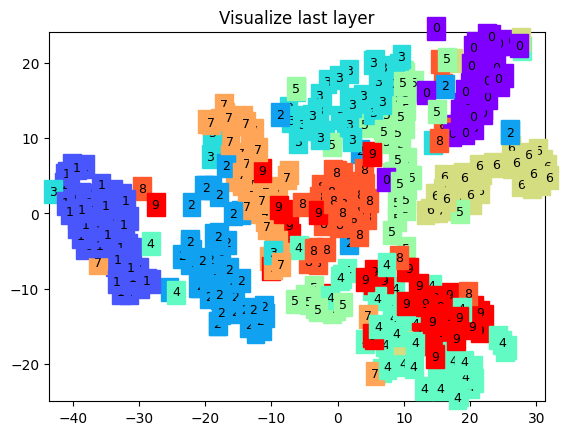

Epoch:  0 | train loss: 0.5555 | test accuracy: 0.87


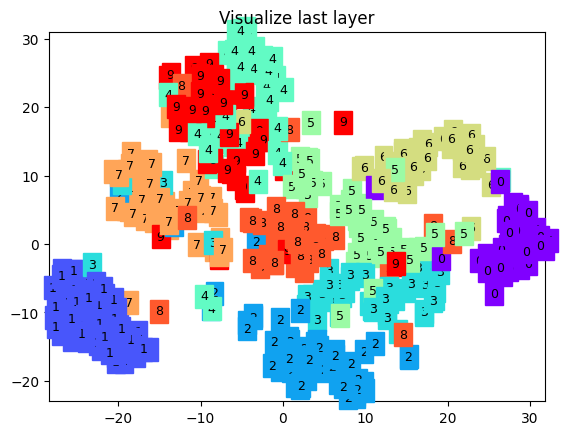

Epoch:  0 | train loss: 0.1277 | test accuracy: 0.94


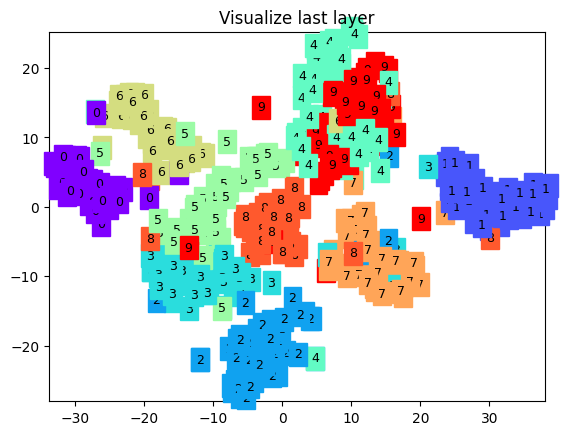

Epoch:  0 | train loss: 0.0556 | test accuracy: 0.95


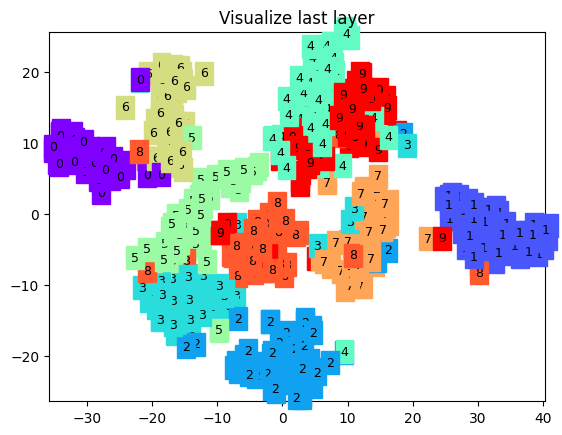

Epoch:  0 | train loss: 0.0353 | test accuracy: 0.96


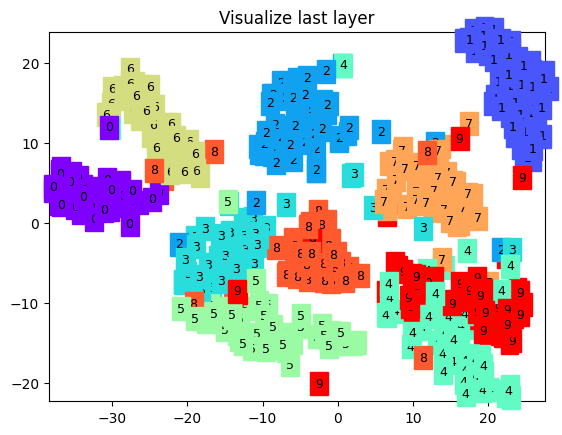

Epoch:  0 | train loss: 0.1828 | test accuracy: 0.97


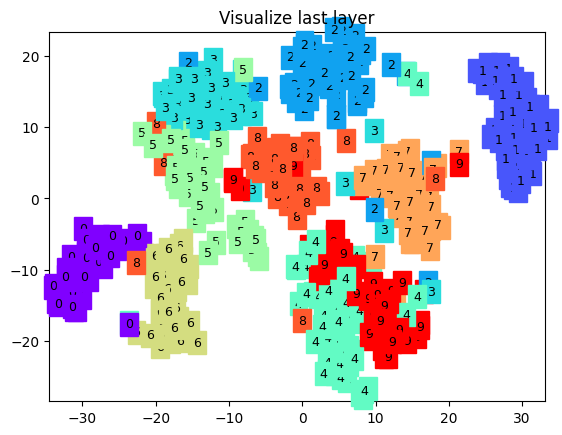

Epoch:  0 | train loss: 0.0184 | test accuracy: 0.97


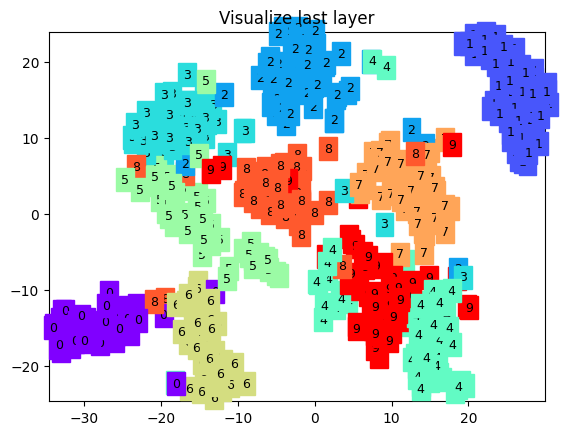

Epoch:  0 | train loss: 0.0947 | test accuracy: 0.97


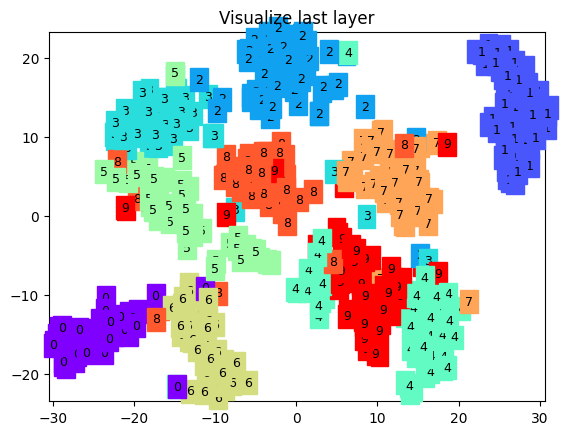

Epoch:  0 | train loss: 0.0369 | test accuracy: 0.96


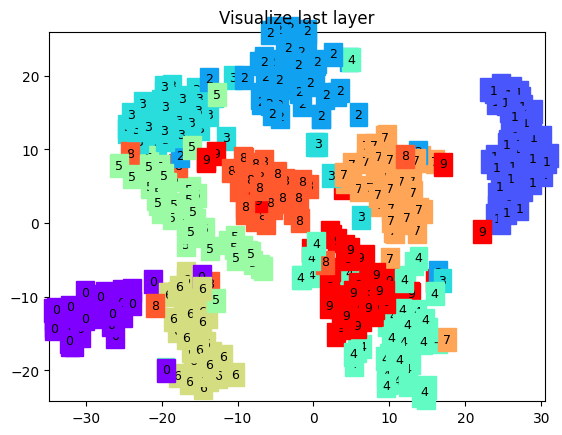

Epoch:  0 | train loss: 0.0950 | test accuracy: 0.98


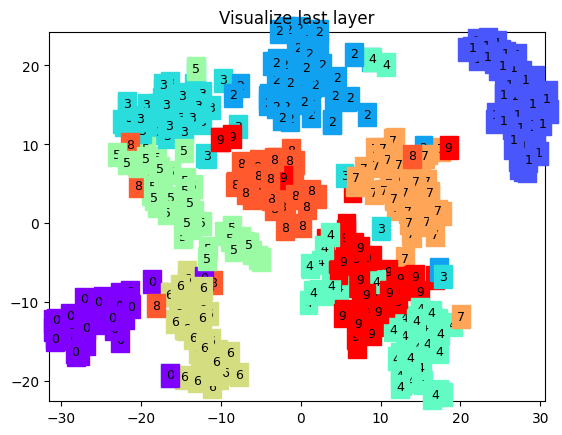

Epoch:  0 | train loss: 0.1938 | test accuracy: 0.98


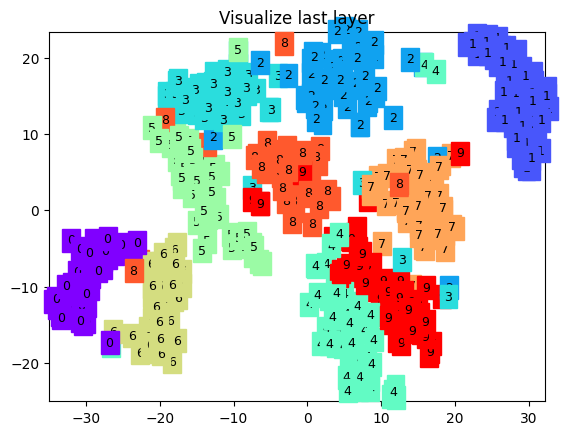

Epoch:  0 | train loss: 0.0208 | test accuracy: 0.98


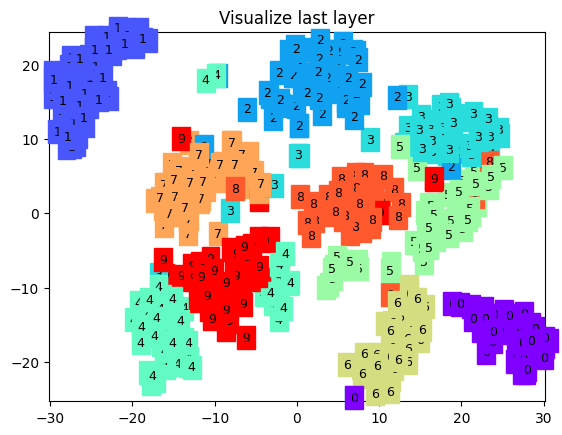

In [100]:
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y
        output = cnn(b_x)[0]               
        # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           
        #  clear gradients for this training step
        loss.backward()                 
        optimizer.step()                
        if step % 100 == 0:
            # backpropagation, compute gradients
            # apply gradients
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == test_y).sum().item() / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data,
            '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca',  n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

In [101]:
 # print 10 predictions from test data
 test_output, _ = cnn(test_x[:10])
 pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
 print(pred_y, 'prediction number')
 print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


### Recipe 3-7. Reloading a Model

In [ ]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
torch.manual_seed(1)    
#sample data
# reproducible
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  #  x data (tensor), 
shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  #  noisy y data (tensor), 
shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [107]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()
    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   #  save only the parameters

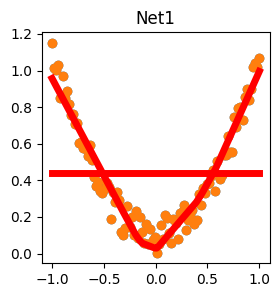

In [108]:
save()

In [109]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

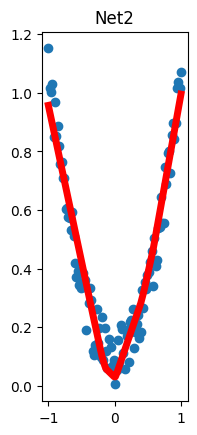

In [110]:
restore_net()

In [111]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
    )
    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

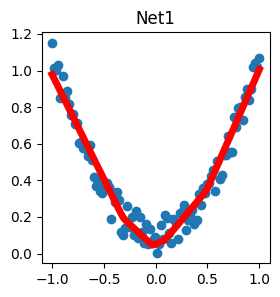

save: 1.1177303791046143


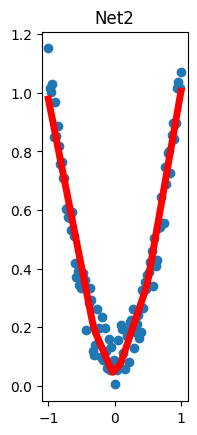

restore_net: 0.5115489959716797


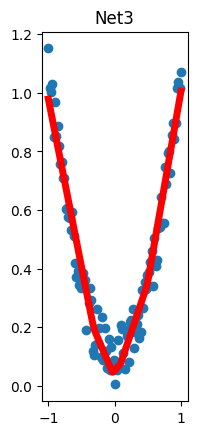

restore_params: 0.297985315322876


In [113]:
import time
# print used time in save, restore_net, restore_params
# define variables for used time
start = time.time()
save()
end = time.time()
print('save:', end - start)
start = time.time()
restore_net()
end = time.time()
print('restore_net:', end - start)
start = time.time()
restore_params()
end = time.time()
print('restore_params:', end - start)

### Implementing a Recurrent Neural Network

In [114]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)    
# reproducible

In [115]:
# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 64
TIME_STEP = 28          
INPUT_SIZE = 28         
LR = 0.01               
#  train the training data n times, to save time, we just train 1 epoch
# rnn time step / image height
# rnn input size / image width
# learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

torch.Size([60000, 28, 28])
torch.Size([60000])


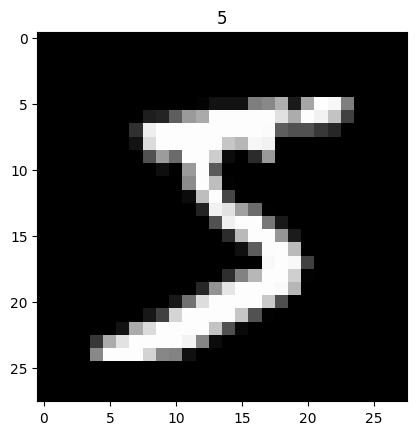

torch.Size([60000])

In [117]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         
    transform=transforms.ToTensor(),    
    download=DOWNLOAD_MNIST,            
)
# plot one example
print(train_data.train_data.size())     
# this is training data
#  Converts a PIL.Image or numpy.ndarray to
#  torch.FloatTensor of shape  (C x H x W) and normalize in the range [0.0, 1.0]
# download it if you don't have it
# (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()
torch.Size([60000, 28, 28])
torch.Size([60000])

In [119]:
 # Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                            batch_size=BATCH_SIZE, 
                                            shuffle=True)
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())

In [120]:
test_x = Variable(test_data.test_data, volatile=True).type(torch.FloatTensor)[:2000]/255.
# shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy().squeeze()[:2000]    
#  covert to numpy array

In [133]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        # if use nn.RNN(), it hardly learns
        # rnn hidden unit
        # number of rnn layer
        # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        self.rnn = nn.LSTM(         
            input_size=INPUT_SIZE,
            hidden_size=64,         
            num_layers=1,           
            batch_first=True,       
        )
        self.out = nn.Linear(64, 10)
    def forward(self, x):
        
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   #  None represents zero initial hidden state
        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [134]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [135]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   #  optimize all RNN parameters
loss_func = nn.CrossEntropyLoss()  

In [137]:
# training and testing
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28, 28))  # reshape x to (batch, time_step, input_size)
        b_y = Variable(y)  # batch y
        output = rnn(b_x)  # rnn output
        loss = loss_func(output, b_y)  # cross entropy loss
        optimizer.zero_grad()  # clear gradients for this training step
        loss.backward()  # backpropagation, compute gradients
        optimizer.step()  # apply gradients

        if step % 50 == 0:
            test_output = rnn(test_x)  # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data, '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 0.2851 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1414 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1869 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0364 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2464 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2664 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0548 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0967 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1770 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2314 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0499 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1002 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1111 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0728 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0488 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1510 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0910 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0105 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0431 | test accuracy

In [138]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
